## Load libraries and define cleaning function

In [1]:
import pandas as pd
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def clean_text(text:str, _remove_stopwords=False, _model=English, _stopwords=STOP_WORDS):
    '''
    Returns a cleaned piece of text that can be processed by a lemmatizer and a tokenizer
    
    Arguments:
        text(str): piece of text to be cleaned
    Returns:
        text once it has been cleaned
    '''
    # Remove non ascii characters
    text = text.encode("ascii", "ignore")
    text = text.decode()
    
    text = text.strip() # Remove spaces at the begining and end of sentences   
    text = text.lower() # Lowercase all data
    text = re.sub(r'\n', r'. ', text)
    text = re.sub(r'([ \.?!])+', r'\1', text) # Remove repeated punctuation, spaces, line breaks

    text = re.sub(r'[\r\t]', '', text) # Remove words that start with a backslash

    text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text) # Remove links
    text = re.sub(r'\[.*?\]', '', text) # remove text in square brackets

    text = re.sub(r'<.*?>+', '', text) # remove everything between <>
    text = re.sub(r'{.*?}+', '', text) # remove everything between {}
    text = re.sub(r'\(.*?\)+', '', text) # remove everything between ()
    
    # text = re.sub(r'\w*\d\w*', r'', text) # remove words containing digits
    
    # text = re.sub(r'[^a-z\s]', '', text) # remove anything that is not a letter or a space
    
    # text = re.sub(r' +', ' ', text) # Remove multiple spaces
    
    if _remove_stopwords:
        text = tokenize_and_stem_text(text, _remove_stopwords=True, _model=_model, _stopwords=_stopwords)
    # text = text.encode("ascii", "ignore")
    return text

## Process EU data

### Clean text files and join in a json with metadata

In [3]:
with open(f'../data/02_preprocessed/full_eu_text.txt', 'w') as f_out:
    for file in os.listdir('../data/01_crawled/eu_data/text/'):
        with open(f'../data/01_crawled/eu_data/text/{file}', 'r') as f_in:
            text = clean_text(f_in.read())
            f_out.write(text)
            f_out.write('\n')

### Statistics on the ammount of text

In [4]:
text = open(f'../data/02_preprocessed/full_eu_text.txt', 'r').read()
n_tokens = len(text.split(' '))
n_tokens

2609734

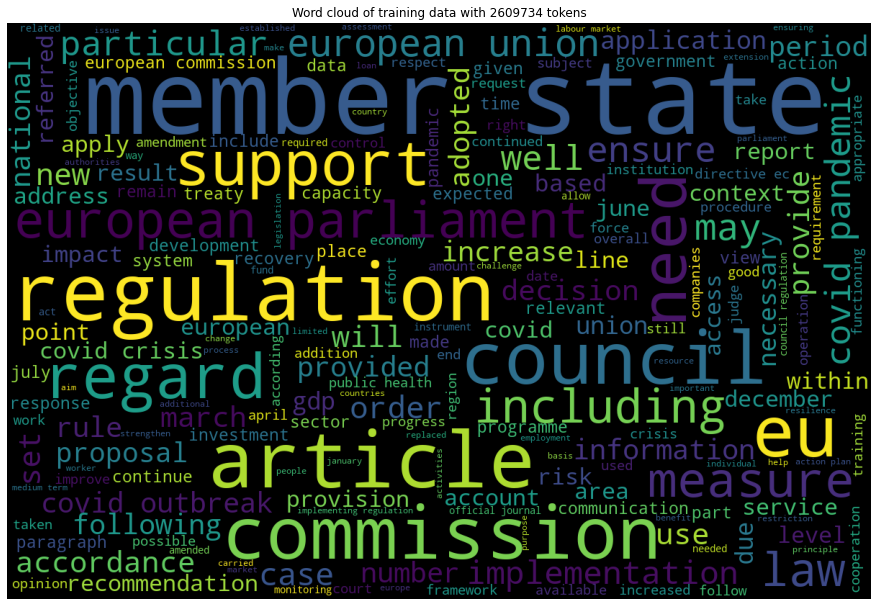

In [5]:
# Generate the wordclou12
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

# plot the WordCloud image                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(f'Word cloud of training data with {n_tokens} tokens')
plt.show()

## Process US data

### Clean text files and join in a json with metadata

In [6]:
with open(f'../data/02_preprocessed/full_us_text.txt', 'w') as f_out:
    for file in os.listdir('../data/01_crawled/us_data/text/'):
        with open(f'../data/01_crawled/us_data/text/{file}', 'r') as f_in:
            text = clean_text(f_in.read())
            f_out.write(text)
            f_out.write('\n')

### Statistics on the ammount of text

In [7]:
text = open(f'../data/02_preprocessed/full_us_text.txt', 'r').read()
n_tokens = len(text.split(' '))
n_tokens

1612161

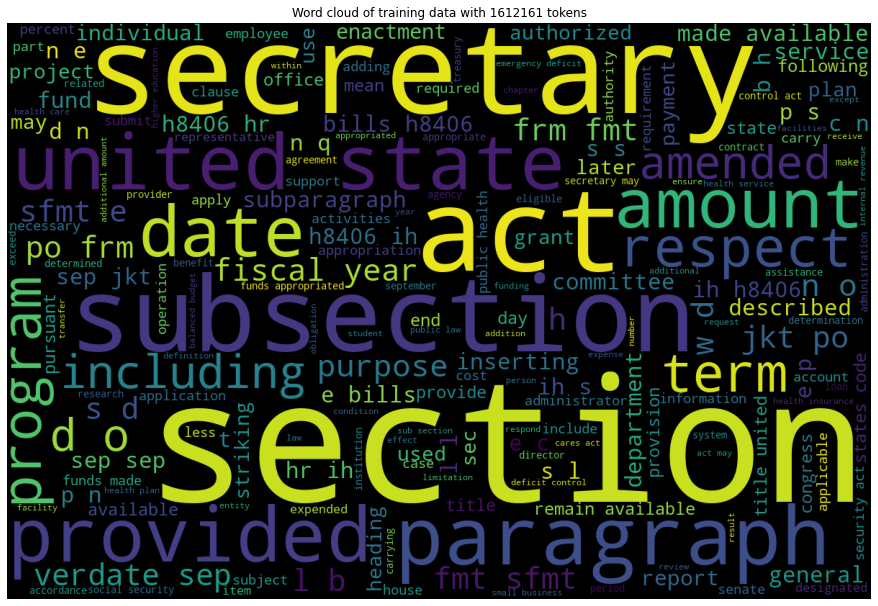

In [8]:
# Generate the wordclou12
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

# plot the WordCloud image                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(f'Word cloud of training data with {n_tokens} tokens')
plt.show()